In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/streetfoodclassifier/datasets/chowmein/000050.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000038.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000081.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000091.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000040.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000021.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000015.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000075.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000029.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000076.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000056.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000077.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000028.png
/kaggle/input/streetfoodclassifier/datasets/chowmein/000084.jpg
/kaggle/input/streetfoodclassifier/datasets/chowmein/000018.jpg
/kaggle/input/streetfoodclassifier/datas

In [26]:
import kagglehub
path = kagglehub.dataset_download('rahuladh/streetfoodclassifier')

print(f'Path to the dataset: {path}')

Path to the dataset: /kaggle/input/streetfoodclassifier


In [27]:
count = 0
dir_path = os.listdir('/kaggle/input/streetfoodclassifier/datasets')
dir_path

for dir in dir_path:
    files = list(os.listdir('/kaggle/input/streetfoodclassifier/datasets/'+dir))
    print(f"{dir} folder has {str(len(files))} images.")
    count = count + len(files)

print(f"Datasets has {str(count)} Images.")


chowmein folder has 101 images.
pakora folder has 96 images.
momo folder has 84 images.
samosa folder has 96 images.
spring_roll folder has 92 images.
Datasets has 469 Images.


In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [54]:
invalid_files = []

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"❌ Not an image: {filepath}")
            invalid_files.append(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"⚠️ Unsupported format ({img_type}): {filepath}")
            invalid_files.append(filepath)

print(f"\n🔍 Found {len(invalid_files)} invalid image(s).")


❌ Not an image: /kaggle/input/streetfoodclassifier/datasets/chowmein/000005.jpg
⚠️ Unsupported format (webp): /kaggle/input/streetfoodclassifier/datasets/chowmein/000014.jpg
❌ Not an image: /kaggle/input/streetfoodclassifier/datasets/chowmein/000020.jpg
⚠️ Unsupported format (webp): /kaggle/input/streetfoodclassifier/datasets/pakora/000011.png
❌ Not an image: /kaggle/input/streetfoodclassifier/datasets/samosa/000031.jpg
❌ Not an image: /kaggle/input/streetfoodclassifier/datasets/samosa/000037.jpg
⚠️ Unsupported format (webp): /kaggle/input/streetfoodclassifier/datasets/spring_roll/000023.jpg
❌ Not an image: /kaggle/input/streetfoodclassifier/datasets/spring_roll/000027.jpg

🔍 Found 8 invalid image(s).


In [55]:
import shutil

dst = Path("/kaggle/working/cleaned_dataset")

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type in img_type_accepted_by_tf:
            rel_path = filepath.relative_to(data_dir)
            new_path = dst / rel_path
            new_path.parent.mkdir(parents=True, exist_ok=True)
            shutil.copy2(filepath, new_path)


In [56]:
directory = '/kaggle/working/cleaned_dataset'

train_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

val_data = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(256, 256),
    batch_size=32
)

Found 461 files belonging to 5 classes.
Using 369 files for training.
Found 461 files belonging to 5 classes.
Using 92 files for validation.


In [57]:
food_names = train_data.class_names
food_names

['chowmein', 'momo', 'pakora', 'samosa', 'spring_roll']

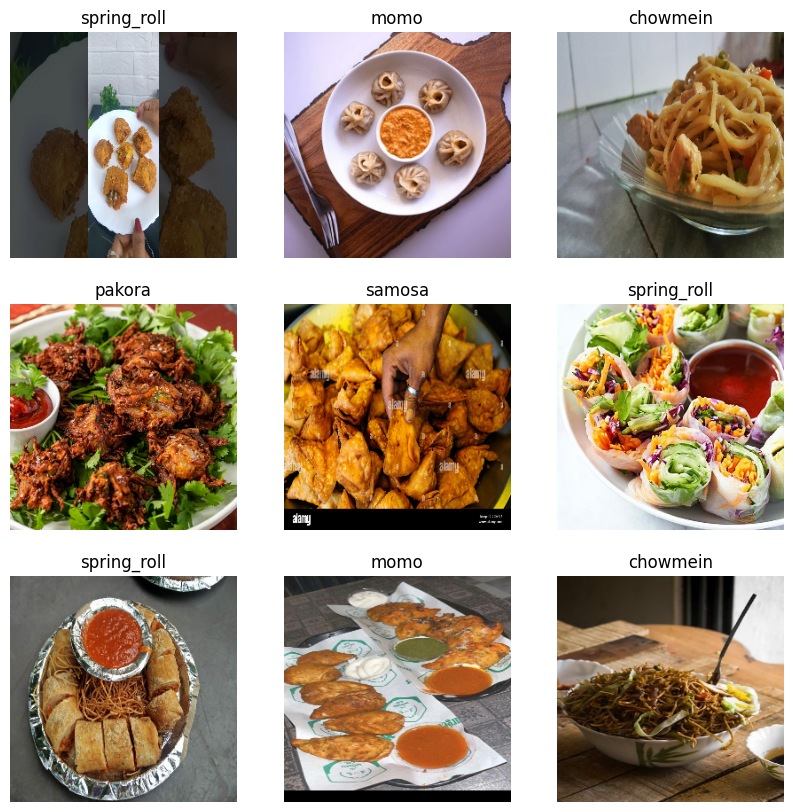

In [58]:
i=0
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range (9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(food_names[labels[i]])
        plt.axis('off')
plt.show()

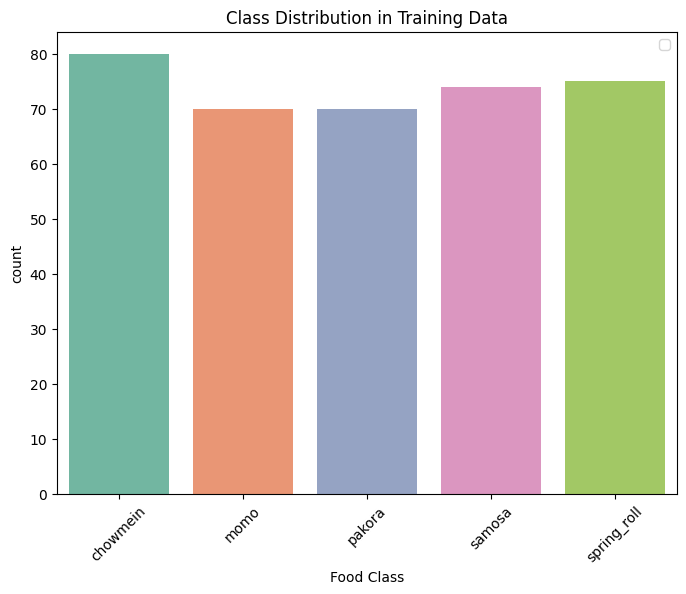

In [60]:
import seaborn as sns
all_labels = []

for images,labels in train_data:
    all_labels.extend(labels.numpy())

all_labels = np.array(all_labels)

plt.figure(figsize=(8,6))
sns.countplot(x=all_labels,palette='Set2')

plt.xticks(ticks = range(len(food_names)), labels = food_names, rotation = 45)

plt.xlabel('Food Class')
# plt.ylabel('Number of Images')
plt.title('Class Distribution in Training Data')
plt.legend()
plt.show()

In [61]:
AUTOTUNE = tf.data.AUTOTUNE

In [62]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)

In [63]:
val_data_data = val_data.cache().shuffle(1000).prefetch(buffer_size= AUTOTUNE)


In [64]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D,Dropout,Flatten,MaxPool2D

In [65]:
eff_net_model = tf.keras.applications.EfficientNetV2S(
    weights='imagenet',
    include_top=False,
    input_shape=(256,256,3)
)

eff_net_model.trainable = False

In [66]:
data_augmentation = tf.keras.Sequential([
    layers.InputLayer(input_shape=(256, 256, 3)),
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),  # This replaces RandomRotation with random translation
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [67]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
inputs = keras.Input(shape=(256,256,3))

x = data_augmentation(inputs)
# x = layers.Rescaling(1./255)(x)
x = preprocess_input(x)
x = eff_net_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(125,activation='relu')(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(len(food_names),activation = "softmax")(x)

model = keras.Model(inputs = inputs, outputs = outputs)


In [68]:
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
lr_scheduler = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.2, patience = 3)
early_stopping = EarlyStopping(monitor  = 'val_loss',patience =10, restore_best_weights = True)

In [71]:
epochs_size = 10
history = model.fit(train_data,validation_data=val_data,epochs=
                    
                    ,batch_size=100,verbose=1,callbacks=[lr_scheduler,early_stopping])

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.8165 - loss: 0.4929 - val_accuracy: 0.7500 - val_loss: 0.7795 - learning_rate: 0.0010
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.8611 - loss: 0.4039 - val_accuracy: 0.7500 - val_loss: 0.7213 - learning_rate: 0.0010
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.8527 - loss: 0.3938 - val_accuracy: 0.7717 - val_loss: 0.6624 - learning_rate: 0.0010
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - accuracy: 0.9033 - loss: 0.3173 - val_accuracy: 0.7826 - val_loss: 0.6244 - learning_rate: 0.0010
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.9013 - loss: 0.2496 - val_accuracy: 0.8043 - val_loss: 0.6028 - learning_rate: 0.0010
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 51s 4s/step - accuracy: 0.9324 - loss: 0.1966 - val_accuracy: 0.7935 - val_loss: 0.5929 - learning_rate: 0.0010
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 4s/step - accuracy: 0.9514 - loss: 0.1975 - val_accuracy: 

In [72]:
model.evaluate(val_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.7897 - loss: 0.5708


[0.5583341121673584, 0.782608687877655]

In [ ]:
model.save('')